In [2]:
using LinearAlgebra
using Plots

In [2]:
E=[1 2 3
   2 3 5]

2×3 Matrix{Int64}:
 1  2  3
 2  3  5

In [ ]:
z_k^2=e_k

In [429]:
function sum_polygon(E)
    points = [zeros(2,1) E[:,1]]
    previous_point = E[:,1]
    for idx in 2:size(E)[2]
        item = E[:,idx]
        next_point = previous_point + item
        points = [points previous_point next_point]
        previous_point = next_point
    end
    return points
end

function generate_polygon(n)
    A=randn(n,2)
    Q,=qr(A)
    x=Q[:,1]
    y=Q[:,2]
    z=x+im*y
    e=z.^2
    #print(norm(e[1]+e[2]+e[3]+e[4]),"\n")
    #print(norm(e[1])+norm(e[2])+norm(e[3])+norm(e[4]))
    E=[real(e)' ; imag(e)']
    points = sum_polygon(E)
    #points=[zeros(2,1) E[:,1] E[:,1] E[:,1]+E[:,2] E[:,1]+E[:,2] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3]+E[:,4]]
    return points
end

function draw(all_polygons, fps=15)
    anim = @animate for i in 1:length(all_polygons)
        points = all_polygons[i]
        plot(points[1,:],points[2,:], xlim=(-1,1), ylim=(-1, 1))
    end
    return anim
end

draw (generic function with 2 methods)

┌ Info: Saved animation to 
│   fn = C:\Users\jarpa\polygons.gif
└ @ Plots C:\Users\jarpa\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\jarpa\\polygons.gif")
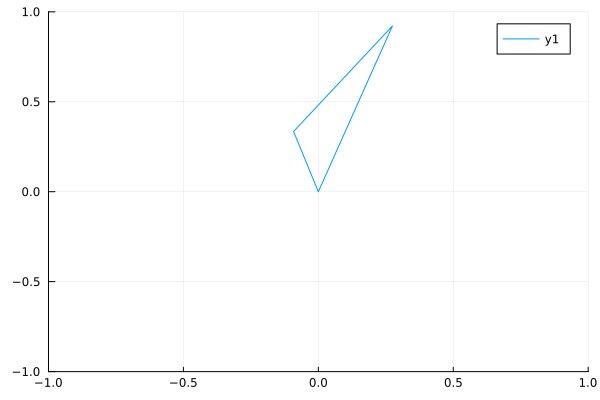

In [434]:
n = 3
fps = 1

polygons = Matrix{Float64}[]
push!(polygons, generate_polygon(n))
push!(polygons, generate_polygon(n))
push!(polygons, generate_polygon(n))
anim = draw(polygons)
gif(anim, "polygons.gif", fps = fps)

5.551115123125783e-17
2.0

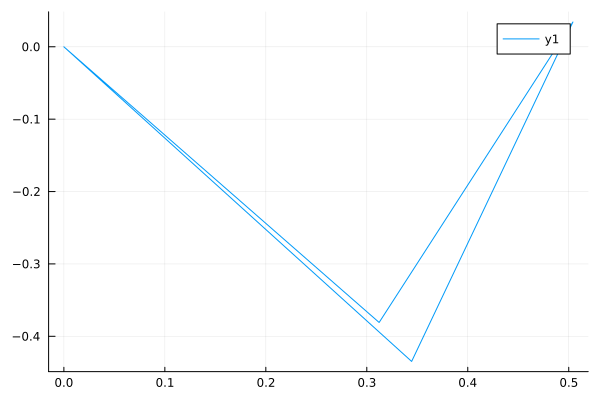

In [438]:
A=randn(4,2)
Q,=qr(A)
x=Q[:,1]
y=Q[:,2]
z=x+im*y
e=z.^2
print(norm(e[1]+e[2]+e[3]+e[4]),"\n")
print(norm(e[1])+norm(e[2])+norm(e[3])+norm(e[4]))
E=[real(e)' ; imag(e)']
points=[zeros(2,1) E[:,1] E[:,1] E[:,1]+E[:,2] E[:,1]+E[:,2] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3]+E[:,4]]
plot(points[1,:],points[2,:])

In [ ]:
plot([5, 1, 1, 3, 3,5],[6, 1, 1, 4,4, 6])

In [64]:
points=[5 1 1 3 3 5;
 6 1 1 4 4 6]

2×6 Matrix{Int64}:
 5  1  1  3  3  5
 6  1  1  4  4  6

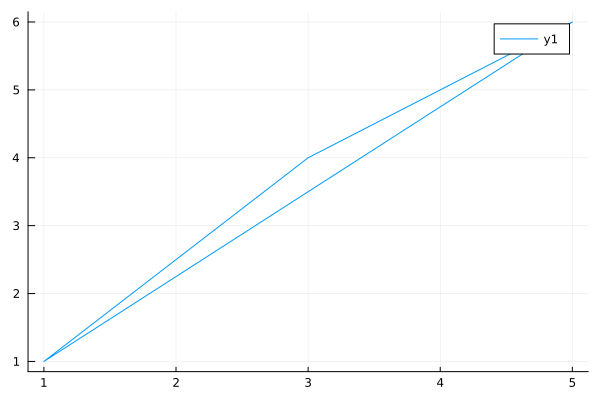

In [ ]:
function teste(M0,M1)
    U,S,V=svd(M0'*M1)
    
    
    
    
    
    
    #M0*U
    #M1*V
end

In [440]:
M0,=qr(randn(3,2))

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 -0.974071    0.209195  -0.0861536
 -0.0105652  -0.42245   -0.906324
 -0.225994   -0.881915   0.413707
R factor:
2×2 Matrix{Float64}:
 1.63518  -0.519103
 0.0       2.13346

In [43]:
A=randn(3,2)
Q,=qr(A)
a=Q[:,1]
b=Q[:,2]
A=randn(3,2)
Q,=qr(A)
c=Q[:,1]
d=Q[:,2]

function projection_basis(a,b,c,d)
    values,vectors=eigen(([a b]'*[a b]*[c d]'*[c d])')
    return vectors
end

function planeGeo(a,b,c,d,t)
    M0 =projection_basis(a,b,c,d)
    M1 =projection_basis(c,d,a,b)
    
    a=M0[:,1]
    b=M0[:,2]
    c=M1[:,1]
    d=M1[:,2]
    
    cperp = c- (c'*a)*a
    cperp=cperp/norm(cperp)
    dperp = d- (d'*b)*b
    dperp=dperp/norm(dperp)
    
    dist1=acos(a'*c)
    dist2=acos(b'*d)
    
    return cos(t*dist1)*a + sin(t*dist1)*cperp, cos(t*dist2)*b + sin(t*dist2)*dperp
end

planeGeo(a,b,c,d,0)

([-0.2749296739625505, 0.9614643385871604], [NaN, NaN])

In [16]:
a

3-element Vector{Float64}:
 -0.6610058176546432
 -0.69202041731474
 -0.290136262894264

In [454]:
A=randn(3,2)
M0,=qr(A)
M0=M0[:,1:2]
B=randn(3,2)
Q,=qr(B)
Q[:,1:2]

3×2 Matrix{Float64}:
 -0.115162   0.661187
 -0.460428  -0.696815
  0.880196  -0.277994